# House Price Prediction

***

Dataset taken from Kaggle competition aiming to predict sales price of houses based in Ames city, situated in the Iowa state of USA. 2 sets of data is provided - **train data** (contains the target variable - **saleprice**) and **test data** (have to predict the saleprice of this set). 

In [699]:
#basic libraries for data processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", palette = "inferno") 
import inspect
%matplotlib inline

#feature processing and statistical libraries
from sklearn.preprocessing import RobustScaler
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder

#ML libraries to be used in modeling
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [561]:
train = pd.read_csv("train.csv") #train set

In [562]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [563]:
test = pd.read_csv("test.csv") #test set
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [564]:
test_id = test.Id.values #savinf ID columns for later use

In [565]:
#dropping the ID column
train.drop(columns = ["Id"], inplace = True)
test.drop(columns = ["Id"], inplace = True)

In [566]:
#converting the column name into lower case to avoid confusion
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [567]:
train.describe(include = "all")

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

In [568]:
#train.info()

### Analysing the target variable (saleprice)

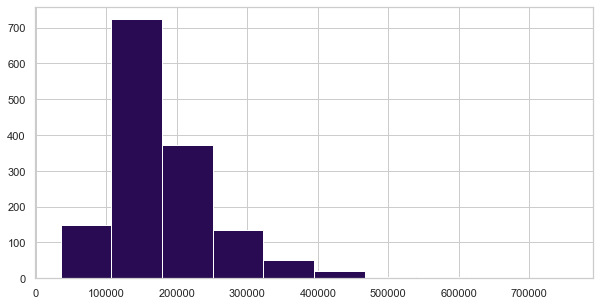

In [569]:
plt.figure(figsize = (10, 5))
plt.hist(train["saleprice"])
plt.show()

In [570]:
train["saleprice"].skew()

1.8828757597682129

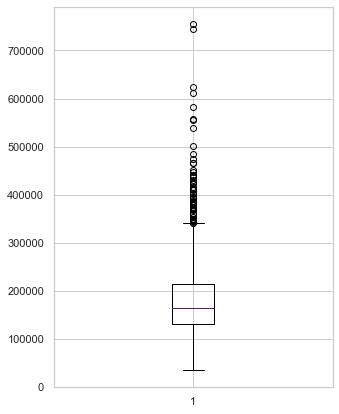

In [571]:
#checking the boxplot of the saleprice
plt.figure(figsize = (5, 7))
plt.boxplot(train["saleprice"])
plt.show()

mu = 180921.20 and sigma = 79415.29


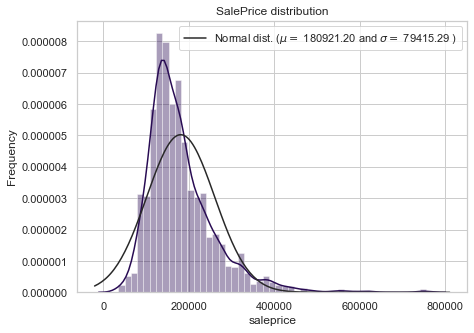

In [572]:
#checking the distributon of th saleprice alongwith its mean and SD
plt.figure(figsize = (7, 5))
sns.distplot(train["saleprice"] , fit = norm);


(mu, sigma) = norm.fit(train["saleprice"])
print("mu = {:.2f} and sigma = {:.2f}".format(mu, sigma))


plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)],
            loc = "best")
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


plt.show()

mu = 12.02 and sigma = 0.40


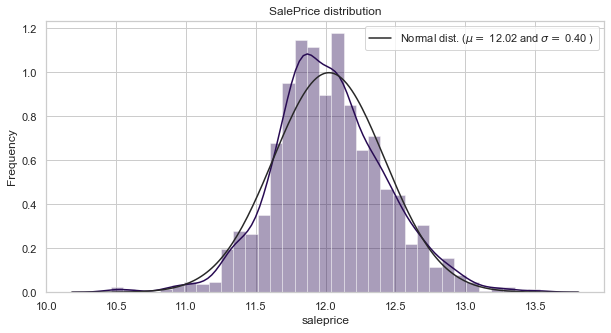

In [573]:
#using log transformation to deal with the skeewness of the target variable, as skewness might affect our result.
#numpy fuction "log1p" applies log(1+x) to all elements of the column.

train["saleprice"] = np.log1p(train["saleprice"])

plt.figure(figsize = (10, 5))
sns.distplot(train["saleprice"] , fit = norm);


(mu, sigma) = norm.fit(train["saleprice"])
print("mu = {:.2f} and sigma = {:.2f}".format(mu, sigma))


plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)],
            loc = "best")
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


plt.show()

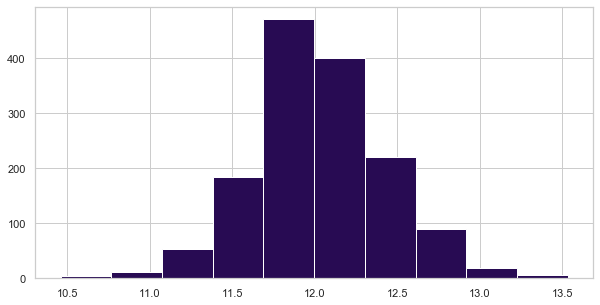

In [574]:
#checking the skew through distribution, graph should be centric
plt.figure(figsize = (10, 5))
plt.hist(train["saleprice"])
plt.show()

In [622]:
#storing the target variable in a separate variable
y = train.saleprice.values

In [623]:
len(y)

1454

In [624]:
#combining the data for EDA
combo_trte = pd.concat([train, test], sort = False)
combo_trte.reset_index(inplace = True, drop = True)
combo_trte

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2909,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2910,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2911,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1

In [625]:
#slicing the saleprice columne out, for EDA and data preprocessing
combo_trte = combo_trte.iloc[:, :-1]
combo_trte

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2909,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2910,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2911,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

#### Some basic inferences -
- Shape of train data:- 1460 rows × 81 columns
- Shape of test data:- 1459 rows × 80 columns
- 43 categorical variables!!
- Presence of Missing values and skewness in target variable (skewness part is taken care of already)
- Conversion of column names into lower class entirely

### Objectives
1. Preprocess the Data Completely
2. Handling Missing Value
3. Basic visualizations - Boxplots , Correlation Plot, Distribution Plots

## Exploratory Data Analysis

In [626]:
#to get a list of numerical columns
numerical_dtype = ["int16", "int32", "int64", "float16", "float32", "float64"]
numerical_cols = combo_trte.select_dtypes(include = numerical_dtype)
numerical_cols

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2909,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2910,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
2911,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [627]:
#to get a list of categorical columns
categorical_dtype = ["object"]
categorical_cols = combo_trte.select_dtypes(include = categorical_dtype)
categorical_cols

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2909,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2910,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2911,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


### Categorical variables handling

### 1> Nominal variables

In [628]:
#nominal variables picked firsthand, not finalised, just on the basis of hypothesis and variable description
nominal_cols = combo_trte[["mssubclass", "mszoning", "lotconfig", "alley", "bldgtype", "miscfeature", "landslope", "exterior1st", "exterior2nd",
                      "masvnrtype", "roofstyle", "roofmatl", "salecondition", "landcontour", "lotconfig", "neighborhood", 
                      "condition1", "condition2", "saletype", "bsmtfintype1", "bsmtfintype2", "heating", "electrical",
                      "functional", "foundation", "garagetype", "garagecond", "paveddrive", "fence", "mosold", "yrsold"]]
                      
nominal_cols.head()

,mssubclass,mszoning,lotconfig,alley,bldgtype,miscfeature,landslope,exterior1st,exterior2nd,masvnrtype,roofstyle,roofmatl,salecondition,landcontour,lotconfig,neighborhood,condition1,condition2,saletype,bsmtfintype1,bsmtfintype2,heating,electrical,functional,foundation,garagetype,garagecond,paveddrive,fence,mosold,yrsold
0,60,RL,Inside,NaN,1Fam,NaN,Gtl,VinylSd,VinylSd,BrkFace,Gable,CompShg,Normal,Lvl,Inside,CollgCr,Norm,Norm,WD,GLQ,Unf,GasA,SBrkr,Typ,PConc,Attchd,TA,Y,NaN,2,2008
1,20,RL,FR2,NaN,1Fam,NaN,Gtl,MetalSd,MetalSd,None,Gable,CompShg,Normal,Lvl,FR2,Veenker,Feedr,Norm,WD,ALQ,Unf,GasA,SBrkr,Typ,CBlock,Attchd,TA,Y,NaN,5,2007
2,60,RL,Inside,NaN,1Fam,NaN,Gtl,VinylSd,VinylSd,BrkFace,Gable,CompShg,Normal,Lvl,Inside,CollgCr,Norm,Norm,WD,GLQ,Unf,GasA,SBrkr,Typ,PConc,Attchd,TA,Y,NaN,9,2008
3,70,RL,Corner,NaN,1Fam,NaN,Gtl,Wd Sdng,Wd Shng,None,Gable,CompShg,Abnorml,Lvl,Corner,Crawfor,Norm,Norm,WD,ALQ,Unf,GasA,SBrkr,Typ,BrkTil,Detchd,TA,Y,NaN,2,2006
4,60,RL,FR2,NaN,1Fam,NaN,Gtl,VinylSd,VinylSd,BrkFace,Gable,CompShg,Normal,Lvl,FR2,NoRidge,Norm,Norm,WD,GLQ,Unf,GasA,SBrkr,Typ,PConc,Attchd,TA,Y,NaN,12,2008


### 2> Ordinal Variables

In [629]:
ordinal_cols = combo_trte[["street", "utilities", "landcontour", "neighborhood", "housestyle", "exterqual", "extercond", 
                      "bsmtqual", "bsmtcond", "bsmtexposure", "heatingqc", "centralair","kitchenqual", "fireplacequ", 
                      "garagefinish", "garagequal", "poolqc"]]

ordinal_cols 

,street,utilities,landcontour,neighborhood,housestyle,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,heatingqc,centralair,kitchenqual,fireplacequ,garagefinish,garagequal,poolqc
0,Pave,AllPub,Lvl,CollgCr,2Story,Gd,TA,Gd,TA,No,Ex,Y,Gd,NaN,RFn,TA,NaN
1,Pave,AllPub,Lvl,Veenker,1Story,TA,TA,Gd,TA,Gd,Ex,Y,TA,TA,RFn,TA,NaN
2,Pave,AllPub,Lvl,CollgCr,2Story,Gd,TA,Gd,TA,Mn,Ex,Y,Gd,TA,RFn,TA,NaN
3,Pave,AllPub,Lvl,Crawfor,2Story,TA,TA,TA,Gd,No,Gd,Y,Gd,Gd,Unf,TA,NaN
4,Pave,AllPub,Lvl,NoRidge,2Story,Gd,TA,Gd,TA,Av,Ex,Y,Gd,TA,RFn,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Pave,AllPub,Lvl,MeadowV,2Story,TA,TA,TA,TA,No,Gd,Y,TA,NaN,NaN,NaN,NaN
2909,Pave,AllPub,Lvl,MeadowV,2Story,TA,TA,TA,TA,No,TA,Y,TA,NaN,Unf,TA,NaN
2910,Pave,AllPub,Lvl,Mitchel,1Story,TA,TA,TA,TA,No,Ex,Y,TA,TA,Unf,TA,NaN
2911,Pave,AllPub,Lvl,Mitchel,SFoyer,TA,TA,Gd,TA,Av,TA,Y,TA,NaN,NaN,NaN,NaN


In [630]:
sorted_train = train.groupby(["neighborhood"])["saleprice"].median().sort_values().index
sorted_train   #for using it as a list in sorting the values of neighborhood classes acc. to increasing order 
               #with respect to saleprice while doing its boxplot down below

Index(['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor',
       'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge', 'NridgHt'],
      dtype='object', name='neighborhood')

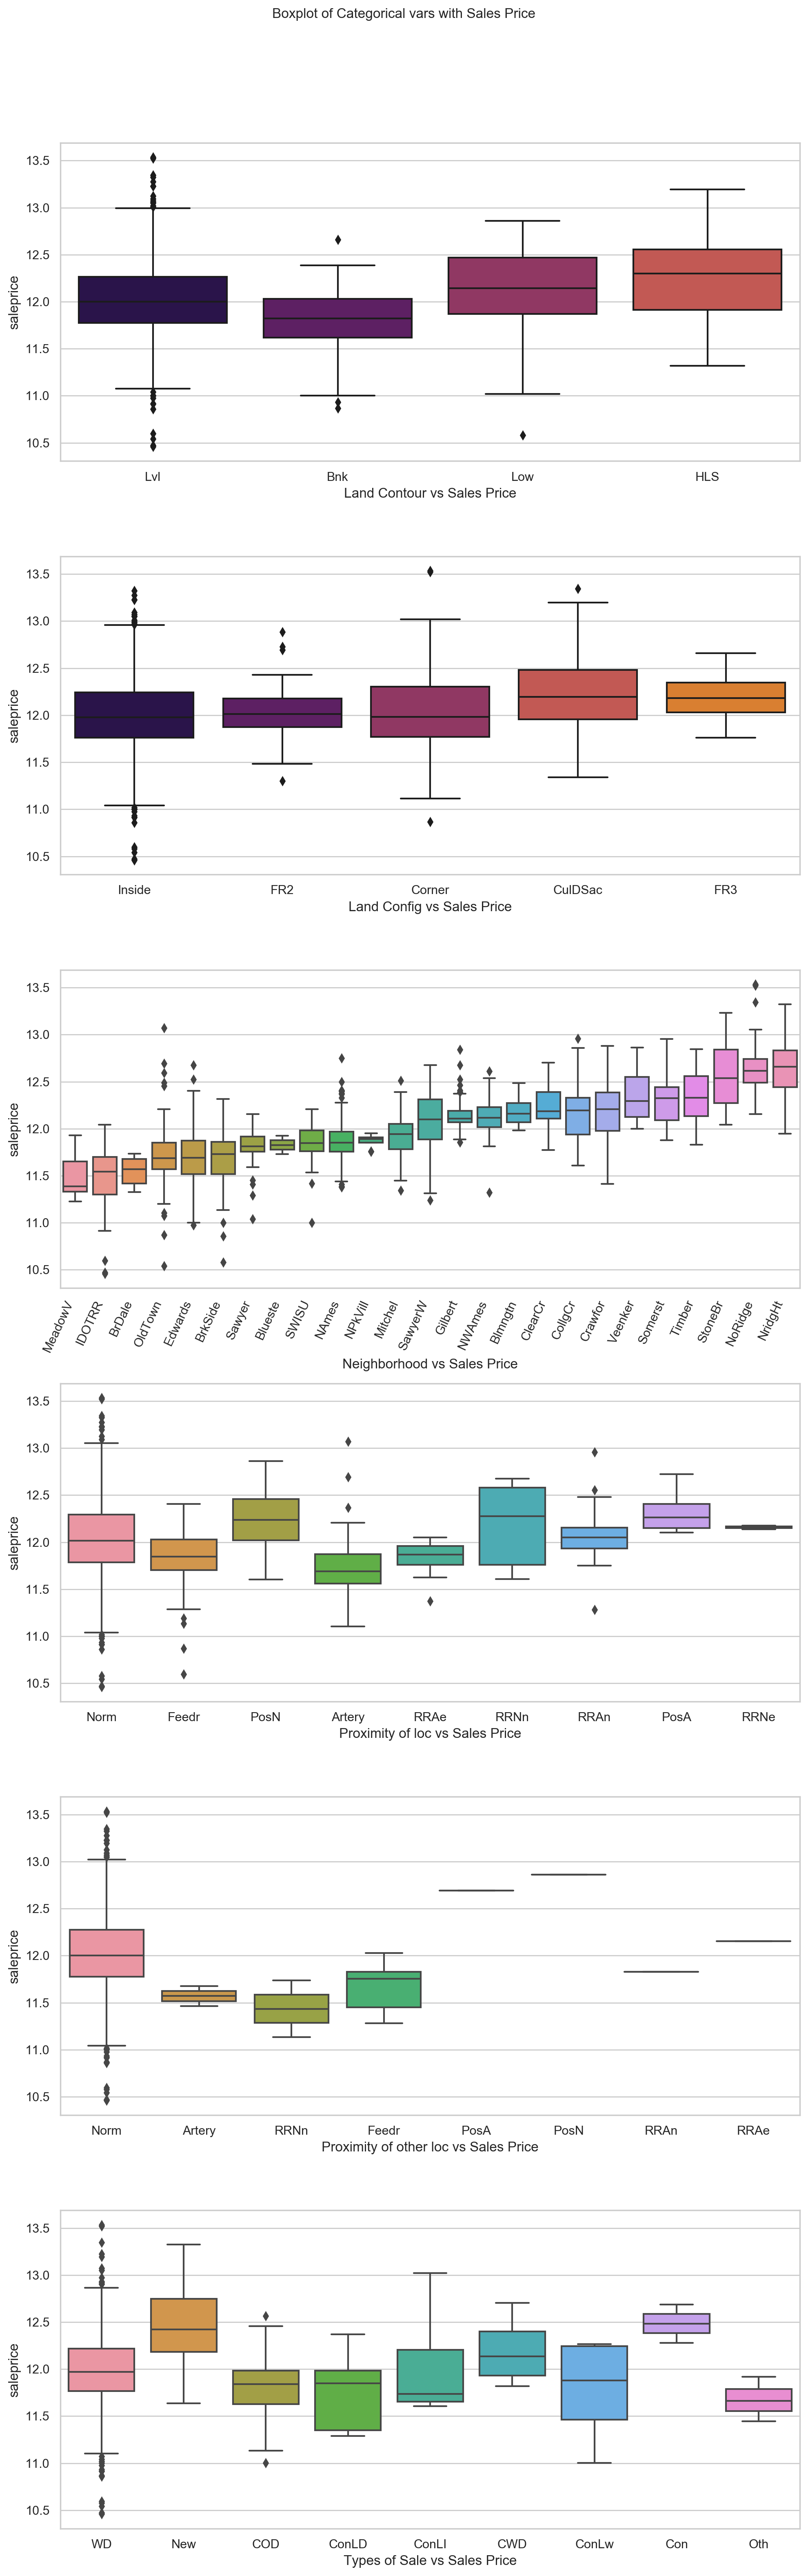

In [631]:
#boxplot of some nominal variables to see their relation with saleprice
fig, axs = plt.subplots(nrows = 6, ncols = 1, figsize = (10,30), dpi = 200, squeeze = False)

sns.boxplot(x = "landcontour", y = "saleprice", data = train, ax = axs[0,0])
axs[0,0].set_xlabel("Land Contour vs Sales Price")
sns.boxplot(x = "lotconfig", y = "saleprice", data = train, ax = axs[1,0])
axs[1,0].set_xlabel("Land Config vs Sales Price")
sns.boxplot(x = "neighborhood", y = "saleprice", data = train, order = list(sorted_train), ax = axs[2,0])
axs[2,0].set_xlabel("Neighborhood vs Sales Price")
axs[2,0].set_xticklabels(axs[2,0].get_xticklabels(), rotation = 65, horizontalalignment = "right")
sns.boxplot(x = "condition1", y = "saleprice", data = train, ax = axs[3,0])
axs[3,0].set_xlabel("Proximity of loc vs Sales Price")
sns.boxplot(x = "condition2", y = "saleprice", data = train, ax = axs[4,0])
axs[4,0].set_xlabel("Proximity of other loc vs Sales Price")
sns.boxplot(x = "saletype", y = "saleprice", data = train, ax = axs[5,0])
axs[5,0].set_xlabel("Types of Sale vs Sales Price")

fig.suptitle("Boxplot of Categorical vars with Sales Price", y = 1.05)
fig.tight_layout()
plt.show()

##### Checking and fixing the missing values

In [632]:
#checkin the null values
null_count = categorical_cols.isnull().sum()
null_count[null_count > 0].sort_values(ascending = False)  #filtering for only the variables containing null values 
                                                           #in decresing order

poolqc          2904
miscfeature     2810
alley           2715
fence           2342
fireplacequ     1420
garagecond       159
garagequal       159
garagefinish     159
garagetype       157
bsmtexposure      82
bsmtcond          82
bsmtqual          81
bsmtfintype2      80
bsmtfintype1      79
masvnrtype        24
mszoning           4
functional         2
utilities          2
exterior1st        1
saletype           1
exterior2nd        1
kitchenqual        1
electrical         1
dtype: int64

In [633]:
combo_trte["saletype"].value_counts()/len(combo_trte)*100

WD       86.543083
New       8.135942
COD       2.986612
ConLD     0.892551
CWD       0.411946
ConLI     0.308960
ConLw     0.274631
Oth       0.240302
Con       0.171644
Name: saletype, dtype: float64

In [634]:
combo_trte["utilities"].value_counts()/len(combo_trte)*100

AllPub    99.897013
NoSeWa     0.034329
Name: utilities, dtype: float64

In [635]:
combo_trte["utilities"].fillna("AllPub", inplace = True)

combo_trte["utilities"].value_counts()/len(combo_trte)*100

AllPub    99.965671
NoSeWa     0.034329
Name: utilities, dtype: float64

In [636]:
print(combo_trte["exterior1st"].value_counts()/len(combo_trte)*100)
print(combo_trte["exterior2nd"].value_counts()/len(combo_trte)*100)

VinylSd    35.187092
MetalSd    15.447992
HdBoard    15.173361
Wd Sdng    14.074837
Plywood     7.518023
CemntBd     4.291109
BrkFace     2.952283
WdShing     1.922417
AsbShng     1.510470
Stucco      1.441813
BrkComm     0.205973
CBlock      0.068658
AsphShn     0.068658
Stone       0.068658
ImStucc     0.034329
Name: exterior1st, dtype: float64
VinylSd    34.809475
MetalSd    15.345005
HdBoard    13.903193
Wd Sdng    13.422588
Plywood     9.200137
CmentBd     4.291109
Wd Shng     2.780639
BrkFace     1.579128
Stucco      1.579128
AsbShng     1.304497
Brk Cmn     0.755235
ImStucc     0.514933
Stone       0.205973
AsphShn     0.137315
CBlock      0.102987
Other       0.034329
Name: exterior2nd, dtype: float64


In [637]:
combo_trte["exterior1st"].fillna("VinylSd", inplace = True)
combo_trte["exterior2nd"].fillna("VinylSd", inplace = True)

print(combo_trte["exterior1st"].value_counts()/len(combo_trte)*100)
print(combo_trte["exterior2nd"].value_counts()/len(combo_trte)*100)

VinylSd    35.221421
MetalSd    15.447992
HdBoard    15.173361
Wd Sdng    14.074837
Plywood     7.518023
CemntBd     4.291109
BrkFace     2.952283
WdShing     1.922417
AsbShng     1.510470
Stucco      1.441813
BrkComm     0.205973
CBlock      0.068658
AsphShn     0.068658
Stone       0.068658
ImStucc     0.034329
Name: exterior1st, dtype: float64
VinylSd    34.843804
MetalSd    15.345005
HdBoard    13.903193
Wd Sdng    13.422588
Plywood     9.200137
CmentBd     4.291109
Wd Shng     2.780639
BrkFace     1.579128
Stucco      1.579128
AsbShng     1.304497
Brk Cmn     0.755235
ImStucc     0.514933
Stone       0.205973
AsphShn     0.137315
CBlock      0.102987
Other       0.034329
Name: exterior2nd, dtype: float64


In [638]:
combo_trte["functional"].fillna("Typ", inplace = True)

combo_trte["functional"].value_counts()/len(combo_trte)*100

Typ     93.134226
Min2     2.403021
Min1     2.231377
Mod      1.201510
Maj1     0.652249
Maj2     0.308960
Sev      0.068658
Name: functional, dtype: float64

In [639]:
combo_trte["saletype"].fillna("WD", inplace = True)

combo_trte["saletype"].value_counts()/len(combo_trte)*100

WD       86.577412
New       8.135942
COD       2.986612
ConLD     0.892551
CWD       0.411946
ConLI     0.308960
ConLw     0.274631
Oth       0.240302
Con       0.171644
Name: saletype, dtype: float64

In [640]:
combo_trte["kitchenqual"].fillna("TA", inplace = True)

combo_trte["kitchenqual"].value_counts()/len(combo_trte)*100

TA    51.184346
Gd    39.443872
Ex     6.968761
Fa     2.403021
Name: kitchenqual, dtype: float64

In [641]:
combo_trte["mszoning"].fillna("RL", inplace = True)

combo_trte["mszoning"].value_counts()/len(combo_trte)

RL         0.776862
RM         0.157913
FV         0.047717
RH         0.008926
C (all)    0.008582
Name: mszoning, dtype: float64

In [642]:
combo_trte["alley"].fillna("no_alley", inplace = True)


(combo_trte["alley"].value_counts()/len(train))*100

no_alley    186.726272
Grvl          8.253095
Pave          5.364512
Name: alley, dtype: float64

In [643]:
combo_trte["bsmtqual"].fillna("no_balcony", inplace = True)


(combo_trte["bsmtqual"].value_counts()/len(train))*100

TA            88.170564
Gd            82.943604
Ex            17.606602
Fa             6.052270
no_balcony     5.570839
Name: bsmtqual, dtype: float64

In [644]:
combo_trte["bsmtcond"].fillna("no_basement", inplace = True)


(combo_trte["bsmtcond"].value_counts()/len(train))*100

TA             178.817056
Gd               8.390646
Fa               7.152682
no_basement      5.639615
Po               0.343879
Name: bsmtcond, dtype: float64

In [645]:
combo_trte["bsmtexposure"].fillna("no_basement", inplace = True)
combo_trte["bsmtfintype1"].fillna("no_basement", inplace = True)
combo_trte["bsmtfintype2"].fillna("no_basement", inplace = True)

print((train["bsmtfintype1"].value_counts()/len(train))*100)
print((train["bsmtfintype2"].value_counts()/len(train))*100)
print((train["bsmtexposure"].value_counts()/len(train))*100)

Unf    29.573590
GLQ    28.541953
ALQ    14.993122
BLQ    10.178817
Rec     9.078404
LwQ     5.089409
Name: bsmtfintype1, dtype: float64
Unf    86.107290
Rec     3.645117
LwQ     3.163686
BLQ     2.200825
ALQ     1.306740
GLQ     0.962861
Name: bsmtfintype2, dtype: float64
No    65.543329
Av    15.199450
Gd     8.803301
Mn     7.840440
Name: bsmtexposure, dtype: float64


In [646]:
combo_trte["masvnrtype"].fillna("CBlock", inplace = True)

combo_trte["masvnrtype"].value_counts()

None       1740
BrkFace     879
Stone       246
CBlock       24
BrkCmn       24
Name: masvnrtype, dtype: int64

In [647]:
combo_trte["electrical"].fillna("SBrkr", inplace = True)

combo_trte["electrical"].value_counts()

SBrkr    2666
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: electrical, dtype: int64

In [648]:
combo_trte["fireplacequ"].fillna("No_Fireplace", inplace = True)

(combo_trte["fireplacequ"].value_counts()/len(train))*100

No_Fireplace    97.661623
Gd              50.894085
TA              40.577717
Fa               5.089409
Po               3.163686
Ex               2.957359
Name: fireplacequ, dtype: float64

In [649]:
combo_trte["garagetype"].fillna("No_garage", inplace = True)
combo_trte["garagefinish"].fillna("No_garage", inplace = True)
combo_trte["garagequal"].fillna("No_garage", inplace = True)
combo_trte["garagecond"].fillna("No_garage", inplace = True)

print(train["garagetype"].value_counts()/len(train)*100)
print(train["garagefinish"].value_counts()/len(train)*100)
print(train["garagequal"].value_counts()/len(train)*100)
print(train["garagecond"].value_counts()/len(train)*100)

Attchd     59.491059
Detchd     26.616231
BuiltIn     5.983494
Basment     1.306740
CarPort     0.618982
2Types      0.412655
Name: garagetype, dtype: float64
Unf    41.540578
RFn    28.954608
Fin    23.933975
Name: garagefinish, dtype: float64
TA    89.752407
Fa     3.301238
Gd     0.962861
Po     0.206327
Ex     0.206327
Name: garagequal, dtype: float64
TA    90.784044
Fa     2.407153
Gd     0.618982
Po     0.481431
Ex     0.137552
Name: garagecond, dtype: float64


In [650]:
combo_trte["poolqc"].fillna("No_pool", inplace = True)

combo_trte["poolqc"].value_counts()

No_pool    2904
Ex            4
Gd            3
Fa            2
Name: poolqc, dtype: int64

In [651]:
combo_trte["fence"].fillna("No_fence", inplace = True)

combo_trte["fence"].value_counts()

No_fence    2342
MnPrv        329
GdPrv        118
GdWo         112
MnWw          12
Name: fence, dtype: int64

In [652]:
combo_trte["miscfeature"].fillna("None", inplace = True)

combo_trte["miscfeature"].value_counts()

None    2810
Shed      93
Gar2       5
Othr       4
TenC       1
Name: miscfeature, dtype: int64

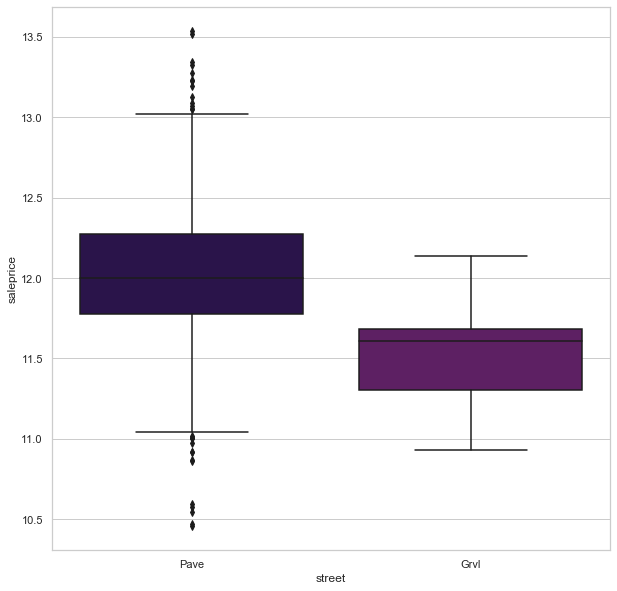

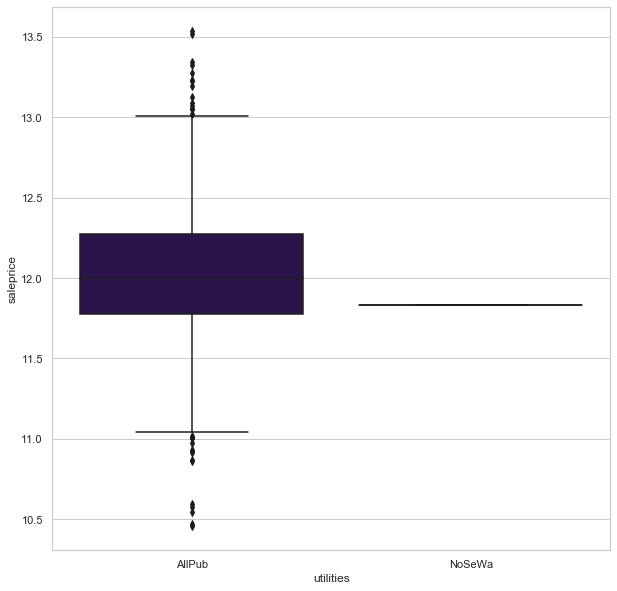

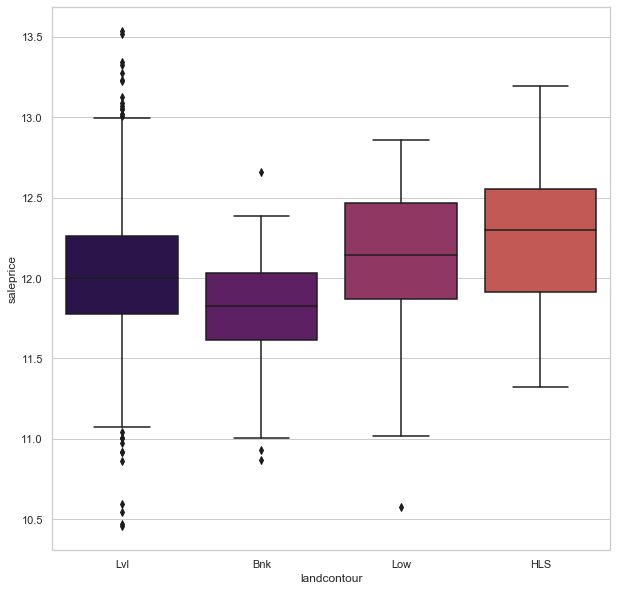

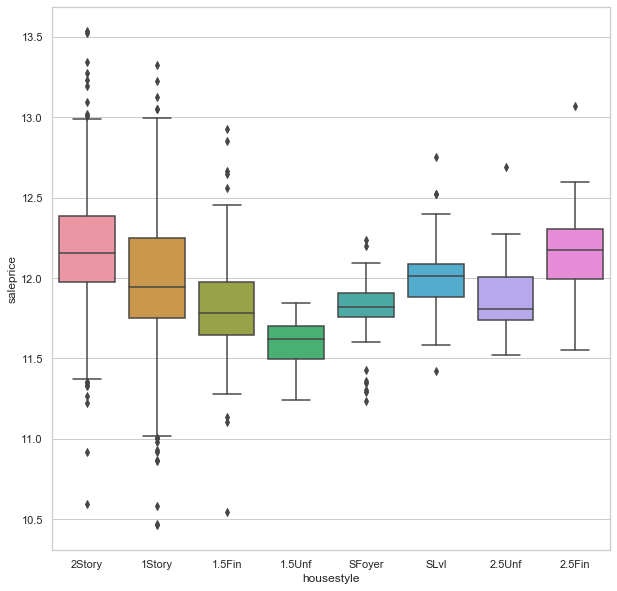

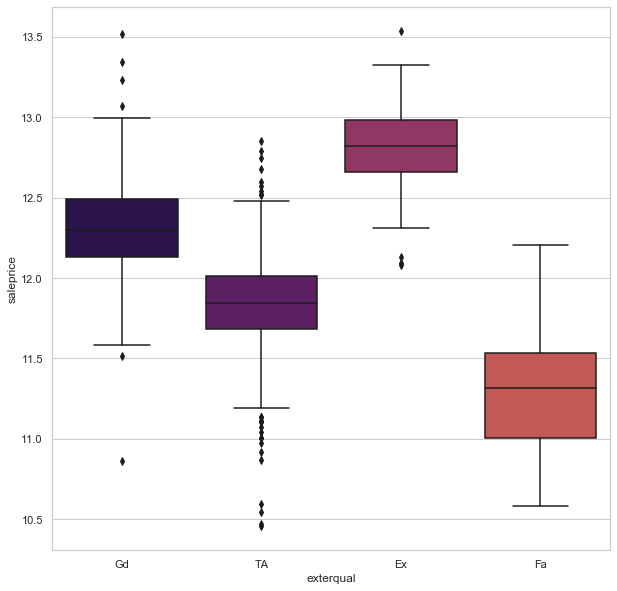

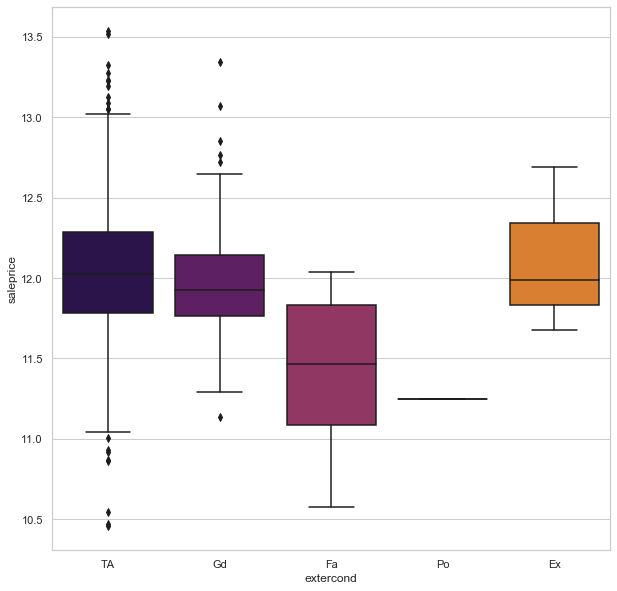

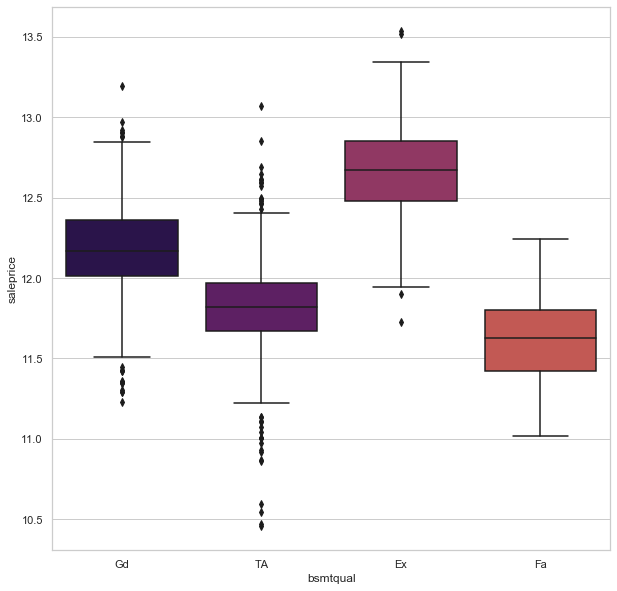

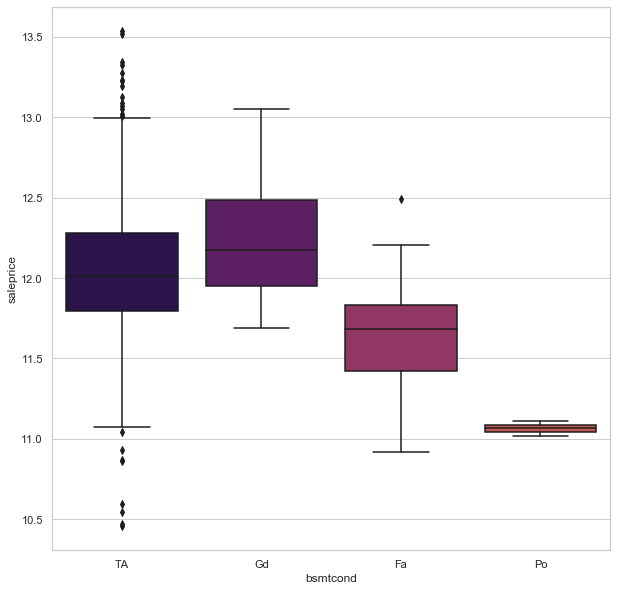

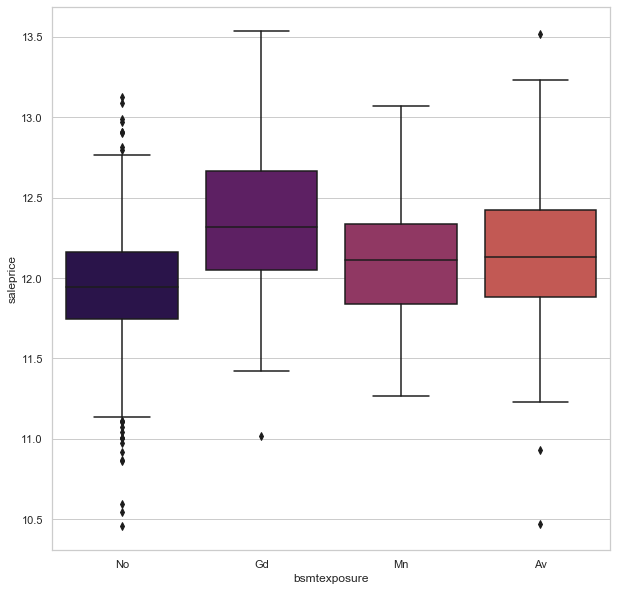

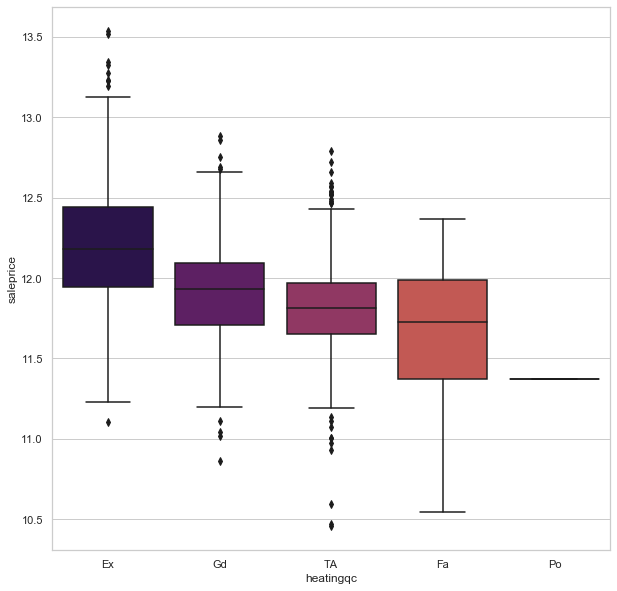

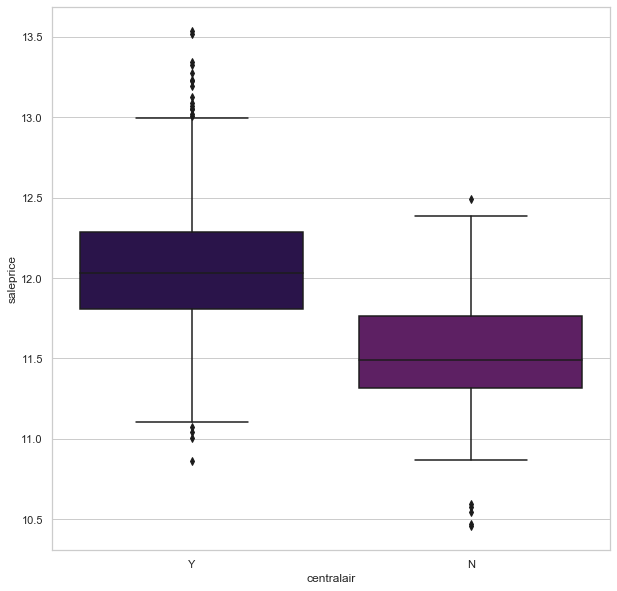

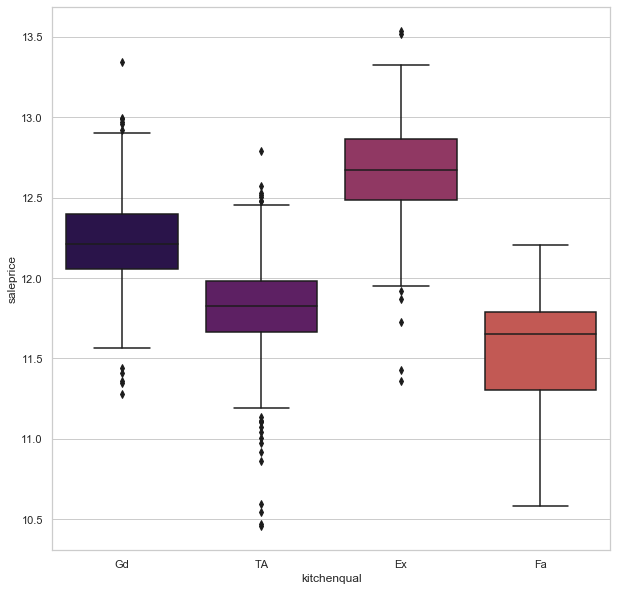

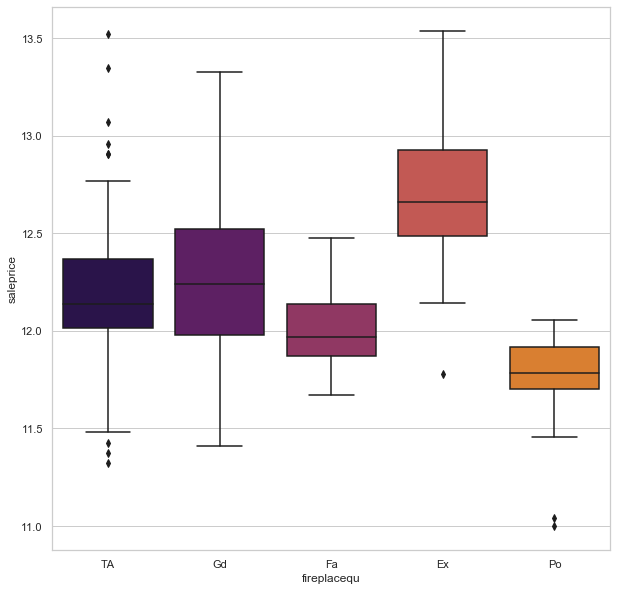

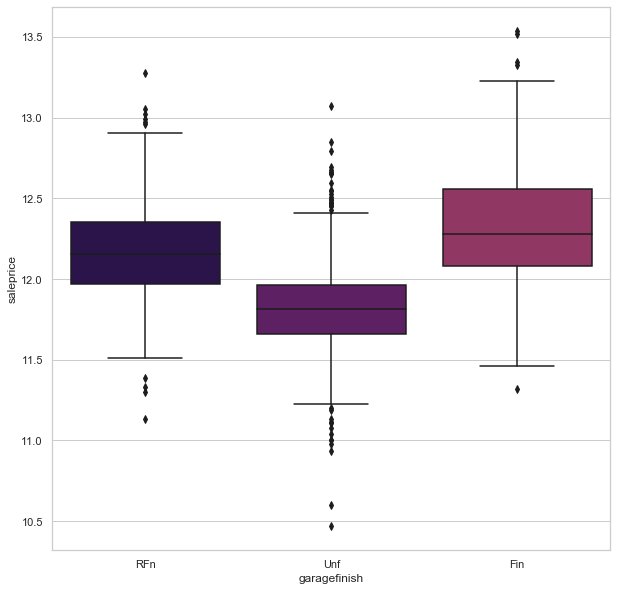

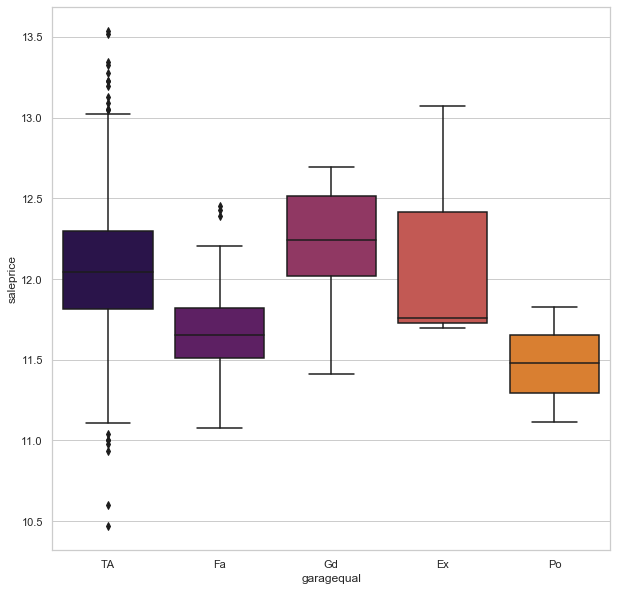

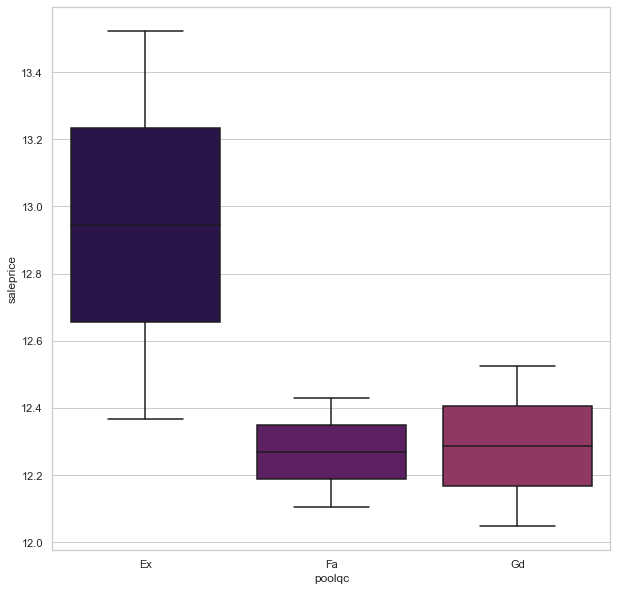

In [653]:
#visualising the ordinal columns
ordinal_cols = train[["street", "utilities", "landcontour", "housestyle", 
                      "exterqual", "extercond", "bsmtqual", "bsmtcond",
                      "bsmtexposure", "heatingqc", "centralair",
                      "kitchenqual", "fireplacequ", "garagefinish", "garagequal", "poolqc"]]

for col in ordinal_cols:
    plt.figure(figsize = (10,10))
    sns.boxplot(x = ordinal_cols[col], y = train["saleprice"])
    plt.show()

In [654]:
train["landslope"].value_counts()

Gtl    1380
Mod      65
Sev       9
Name: landslope, dtype: int64

### Some Observations - 
- Only AllPub and NoSeWa subtypes are present in utilities.
- landslope feature has the order - gentle slope < moderate slope < severe slope, with respect to saleprice.
- houses with:- 
    - paved street, 
    - having 2 or 2.5 storey, 
    - excellent attributes (external quality and condition of house, kitchen, basement, pool quality, fireplace quality, and           heating quality/condition), 
    - central AC, and 
    - finished garage with atleast in order of good quality measure 
  
  are having highest saleprice range which goes according to the basic hypothesis we can form after getting to understand the     variables.

### Numerical data handling

In [655]:
#top 10 numerical variables having null values 
numerical_cols.isnull().sum().sort_values(ascending = False)[0:11]

lotfrontage     483
garageyrblt     159
masvnrarea       23
bsmthalfbath      2
bsmtfullbath      2
garagearea        1
bsmtfinsf1        1
bsmtfinsf2        1
bsmtunfsf         1
totalbsmtsf       1
garagecars        1
dtype: int64

In [656]:
combo_trte["garagecars"].fillna(combo_trte["garagecars"].median(), inplace = True)

combo_trte["garagecars"].value_counts()

2.0    1590
1.0     776
3.0     373
0.0     157
4.0      16
5.0       1
Name: garagecars, dtype: int64

In [657]:
null_colslist = ["masvnrarea", "bsmthalfbath", "bsmtfullbath", "garagearea", 
                 "bsmtfinsf1", "bsmtfinsf2", "bsmtunfsf", "totalbsmtsf"]

for col in null_colslist:
    combo_trte[col] = combo_trte[col].fillna(0)

In [658]:
combo_trte["garageyrblt"].fillna(combo_trte["garageyrblt"].median(), inplace = True)

combo_trte["garageyrblt"].isnull().sum()

0

In [659]:
test["garageyrblt"].isnull().sum() #/len(combo_trte["garageyrblt"])*100

78

In [660]:
numerical_cols["bsmthalfbath"].value_counts()

0.0    2737
1.0     170
2.0       4
Name: bsmthalfbath, dtype: int64

In [661]:
numerical_cols["bsmtfullbath"].value_counts()

0.0    1704
1.0    1170
2.0      35
3.0       2
Name: bsmtfullbath, dtype: int64

#### Lot Frontage missing values handling

In [615]:
combo_trte["lotfrontage"].isnull().sum()/len(combo_trte)*100

16.649537512846866

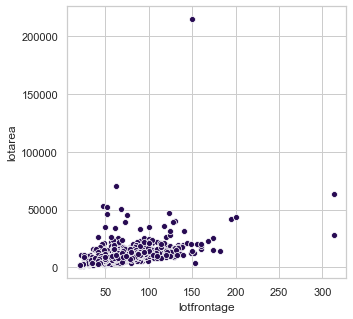

In [616]:
plt.figure(figsize = (5,5))
sns.scatterplot(combo_trte["lotfrontage"], combo_trte["lotarea"])
plt.show()

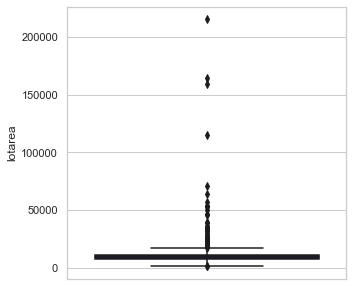

In [617]:
plt.figure(figsize = (5,5))
sns.boxplot(train["lotarea"], orient = "vertical")
plt.show()

In [618]:
#trimming down the extreme outliers
train = train.drop(train[(train["lotarea"] > 100000)].index)
test = test.drop(test[(test["lotarea"] > 100000)].index)

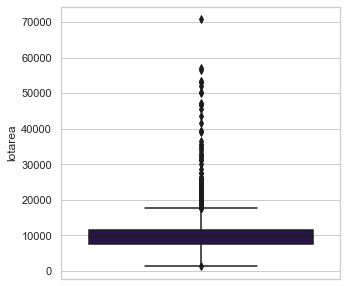

In [662]:
#checking the plot one more time after removing some outliers
plt.figure(figsize = (5,5))
sns.boxplot(combo_trte["lotarea"], orient = "vertical")
plt.show()

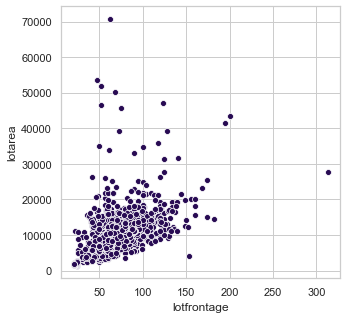

In [663]:
#after removing the outliers
plt.figure(figsize = (5,5))
sns.scatterplot(combo_trte["lotfrontage"], combo_trte["lotarea"])
plt.show()

In [619]:
#filling the missing values of lot frontage with median grouped on the basis of neighborhood
combo_trte["lotfrontage"] = combo_trte.groupby("neighborhood")["lotfrontage"].transform(lambda x: x.fillna(x.median()))

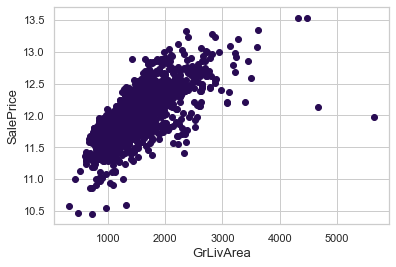

In [620]:
#checking the relation of ground living room area with saleprice
fig, ax = plt.subplots()
ax.scatter(x = train['grlivarea'], y = train['saleprice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

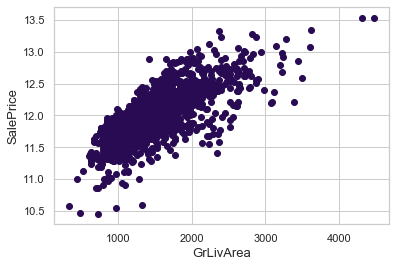

In [621]:
#removing some of the extreme outliers from Grlivarea with respect to saleprice
train = train.drop(train[(train["grlivarea"] > 4000) & (train["saleprice"] < 12.5)].index)

fig, ax = plt.subplots()
ax.scatter(x = train['grlivarea'], y = train['saleprice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [664]:
#saving the row count for further use
rtrain = train.shape[0]
rtest = test.shape[0]

print(rtrain)
print(rtest)

1454
1459


## Feature Processing

In [665]:
#top 20 variables correlated with saleprice
corr_vals = train.corr()
corr_vals["saleprice"].sort_values(ascending = False)[:21]

saleprice       1.000000
overallqual     0.823161
grlivarea       0.724709
garagecars      0.681935
garagearea      0.657123
totalbsmtsf     0.645372
1stflrsf        0.618170
fullbath        0.595124
yearbuilt       0.589629
yearremodadd    0.568487
garageyrblt     0.545803
totrmsabvgrd    0.538885
fireplaces      0.488279
masvnrarea      0.434817
bsmtfinsf1      0.388876
lotfrontage     0.369665
lotarea         0.363752
wooddecksf      0.335260
openporchsf     0.327018
2ndflrsf        0.322569
halfbath        0.318295
Name: saleprice, dtype: float64

In [666]:
date_cols = ["yearbuilt", "yearremodadd", "garageyrblt", "mosold", "yrsold"]

In [667]:
#combo_trte[["yearbuilt", "yearremodadd", "garageyrblt", "mosold", "yrsold"]].nunique()

##### Converting some numerical vars to categorical

In [668]:
#mssubclass #mosold #yrsold

combo_trte['mssubclass'] = combo_trte["mssubclass"].apply(str)

combo_trte["yrsold"] = combo_trte["yrsold"].astype(str)
combo_trte["mosold"] = combo_trte["mosold"].astype(str)

In [669]:
combo_trte

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,60,RL,65.0,8450,Pave,no_alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,No_pool,No_fence,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,no_alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,No_pool,No_fence,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,no_alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,No_pool,No_fence,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,no_alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,No_pool,No_fence,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,no_alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,No_pool,No_fence,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,160,RM,21.0,1936,Pave,no_alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,No_Fireplace,No_garage,1979.0,No_garage,0.0,0.0,No_garage,No_garage,Y,0,0,0,0,0,0,No_pool,No_fence,None,0,6,2006,WD,Normal
2909,160,RM,21.0,1894,Pave,no_alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,No_Fireplace,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,No_pool,No_fence,None,0,4,2006,WD,Abnorml
2910,20,RL,160.0,20000,Pave,no_alley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,No_pool,No_fence,None,0,9,2006,WD,Abnorml

#### Label Encoding

In [670]:
cols = ("street", "alley", "landcontour", "exterqual", "extercond", "bsmtqual", "bsmtcond", "bsmtexposure", 
        "bsmtfintype1", "bsmtfintype2", "heatingqc", "centralair", "kitchenqual", "fireplacequ", "landslope", 
        "lotshape", "garagefinish", "garagequal", "garagecond", "poolqc","centralair", "mssubclass", 
        "overallcond", "yrsold", "mosold", "functional", "fence", "paveddrive")

        #'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        #'ExterQual', 'ExterCond','HeatingQC', ' PoolQC', 'KitchenQual', 'BsmtFinType1', 
        #'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        #'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        #'YrSold', 'MoSold'

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(combo_trte[c].values)) 
    combo_trte[c] = lbl.transform(list(combo_trte[c].values))

       
print('Shape all_data: {}'.format(combo_trte.shape))


Shape all_data: (2913, 79)


#### Box - cox transformation

In [671]:
#Checking the skewness in numerical variables
numeric_feats = combo_trte.dtypes[combo_trte.dtypes != "object"].index

skewed_feats = combo_trte[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
miscval,21.947774
poolarea,17.676417
lowqualfinsf,12.076090
3ssnporch,11.364106
landslope,4.954546
kitchenabvgr,4.297140
bsmtfinsf2,4.159265
enclosedporch,3.999248
screenporch,3.941914
bsmthalfbath,3.941288


In [672]:
#Variables with skewness above 0.75 will be log transformed by using Box-Cox transformation
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:

    combo_trte[feat] = boxcox1p(combo_trte[feat], lam)

There are 59 skewed numerical features to Box Cox transform


##### Converting remaining columns to dummies

In [673]:
combo_trte = pd.get_dummies(combo_trte)

In [674]:
combo_trte.head()

,mssubclass,lotfrontage,lotarea,street,alley,lotshape,landcontour,landslope,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No_garage,miscfeature_Gar2,miscfeature_None,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.194318,1.540963,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.540963,1.540963,1.194318,11.170327,2.055642,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,14.187527,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,0.0,1.820334,1.194318,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0

##### Splitting the data back to train and test

In [675]:
#exporting the cleaned data
#combo_trte.to_csv("preprocessed_data.csv", index = False)

In [676]:
ppd_data = pd.read_csv("preprocessed_data.csv")

In [677]:
ppd_data.drop(columns = "garageyrblt", inplace = True)
ppd_data

,mssubclass,lotfrontage,lotarea,street,alley,lotshape,landcontour,landslope,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No_garage,miscfeature_Gar2,miscfeature_None,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.194318,1.540963,1.540963,0.000000,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.540963,1.540963,1.194318,11.170327,2.055642,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,0.000000,1.820334,1.194318,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0

In [678]:
train = ppd_data[:rtrain]
test = ppd_data[rtrain:]
print(train.shape)
print(test.shape)

(1454, 218)
(1458, 218)


In [679]:
train

,mssubclass,lotfrontage,lotarea,street,alley,lotshape,landcontour,landslope,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No_garage,miscfeature_Gar2,miscfeature_None,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.194318,1.540963,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.540963,1.540963,1.194318,11.170327,2.055642,0.000000,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.000000,0.0,1.540963,1.820334,0.000000,1.820334,1.194318,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,

In [680]:
test.reset_index(inplace = True, drop = True)

In [681]:
test

,mssubclass,lotfrontage,lotarea,street,alley,lotshape,landcontour,landslope,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No_garage,miscfeature_Gar2,miscfeature_None,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,2.055642,6.244956,21.327220,0.730463,1.194318,0.000000,1.540963,0.000000,2.259674,2.055642,14.116605,14.116605,6.808145,1.540963,1.820334,1.540963,1.540963,1.540963,0.000000,11.901094,2.055642,0.0,9.752379,12.943735,1.820334,0.730463,12.943735,0.000000,0.0,12.943735,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.000000,1.540963,1.540963,0.730463,9.118181,2.055642,2.055642,1.194318,9.672623,4.792130,0.0,0.0,0.000000,0.0,1.540963,1.820334,20.777526,2.602594,1.820334,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Scaling the train, y and test data with RobustScaler

In [682]:
#rscale = RobustScaler()
#train = rscale.fit_transform(train)
#y = rscale.fit_transform(y.reshape(-1, 1))
#test = rscale.fit_transform(test)

In [683]:
train_cols = train.columns
test_cols = test.columns

In [684]:
def scaled_data(data, column, scaler):
    for col in column:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [685]:
scaler = RobustScaler()
train_scaled = scaled_data(train, train_cols, scaler)
test_scaled = scaled_data(test, test_cols, scaler)

In [686]:
train_scaled

,mssubclass,lotfrontage,lotarea,street,alley,lotshape,landcontour,landslope,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No_garage,miscfeature_Gar2,miscfeature_None,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0.754239,-0.256476,-0.262548,0.0,0.0,0.0,0.0,0.0,0.469532,0.000000,0.649094,0.241893,1.052601,-1.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.141136,0.000000,0.000000,-0.838715,-0.297335,0.000000,0.0,-0.517252,1.038541,0.0,0.359440,1.0,0.000000,0.0,1.0,0.000000,0.0,-1.0,0.891567,0.000000,-1.000000,0.000000,0.000000,0.000000,0.247490,0.0,0.0,0.0,0.000000,0.266606,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,-0.892494,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [687]:
test_scaled

,mssubclass,lotfrontage,lotarea,street,alley,lotshape,landcontour,landslope,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No_garage,miscfeature_Gar2,miscfeature_None,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0.000000,0.514201,0.975353,0.0,0.0,-1.0,0.0000,0.000000,0.000000,1.000000,-0.314042,-0.832292,0.890357,0.0,0.0,1.0,0.0,0.000000,-1.386607,0.221175,0.0,0.0,-0.096947,0.592843,1.000000,0.0,0.458251,0.000000,0.0,-0.172960,0.0,0.000000,-1.0,1.0,0.000000,0.0,-1.0,0.000000,0.0,-0.5,0.000000,0.224954,-1.000000,-0.709549,0.000000,0.000000,0.0,1.252223,0.068283,0.0,0.0,0.000000,0.0,0.0,0.000000,20.777526,0.233694,0.772383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [688]:
#y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [689]:
#y_scaled

In [690]:
#y = pd.DataFrame(y_scaled)

In [691]:
#y.columns = ["saleprice"]

#### PCA for reducing the columns

In [692]:
pca = PCA(n_components = 80, random_state = 24)
var = pca.fit(train_scaled)

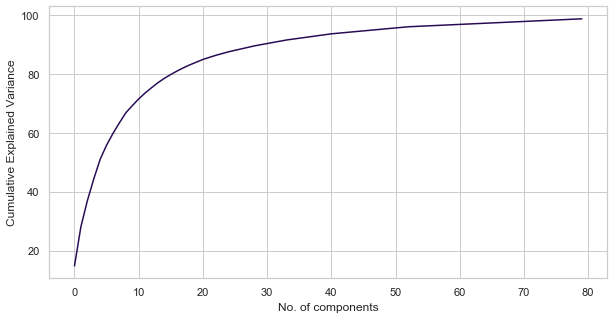

In [693]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, 3)*100)
plt.figure(figsize = (10, 5))
plt.plot(var1)
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [694]:
var1

array([14.8, 28.1, 36.9, 44.3, 51. , 55.8, 59.8, 63.4, 66.8, 69.2, 71.5,
       73.5, 75.3, 77. , 78.5, 79.8, 81. , 82.1, 83.1, 84. , 84.9, 85.6,
       86.3, 86.9, 87.5, 88. , 88.5, 89. , 89.5, 89.9, 90.3, 90.7, 91.1,
       91.5, 91.8, 92.1, 92.4, 92.7, 93. , 93.3, 93.6, 93.8, 94. , 94.2,
       94.4, 94.6, 94.8, 95. , 95.2, 95.4, 95.6, 95.8, 96. , 96.1, 96.2,
       96.3, 96.4, 96.5, 96.6, 96.7, 96.8, 96.9, 97. , 97.1, 97.2, 97.3,
       97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4,
       98.5, 98.6, 98.7])

In [695]:
reduced_train = pca.fit_transform(train_scaled)
reduced_train

array([[-1.77621225e+00, -7.53368457e-01, -2.05116509e-01, ...,
        -7.52917377e-02, -5.77300815e-02, -2.87247741e-02],
       [-9.71157608e-01, -5.38037888e-01, -5.09507517e-01, ...,
         2.18373698e-01,  3.95970904e-01, -9.82236885e-02],
       [-1.87563380e+00, -1.15651432e+00,  1.58027591e-01, ...,
         5.38057032e-03, -2.49530358e-02, -7.16463761e-02],
       ...,
       [ 1.24437079e+01, -2.77557401e-02,  2.96296287e+00, ...,
        -1.67203160e-01, -3.52928218e-02, -1.70289478e-02],
       [ 7.22738952e+00, -3.18201738e+00, -1.39831691e+00, ...,
        -6.59415108e-02,  2.78049313e-02,  6.05247687e-03],
       [ 6.30105426e+00, -3.61131973e+00, -1.77117816e+00, ...,
        -1.54366730e-01,  2.92203798e-01,  9.33029955e-02]])

In [696]:
train_reborn =  pd.DataFrame(reduced_train)
train_reborn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,-1.776212,-0.753368,-0.205117,-0.597665,0.442462,-1.328512,-0.044005,-0.752463,0.858010,0.494187,-0.832661,0.139983,0.614957,-0.171149,-0.466624,0.433763,0.462966,-0.658254,-1.033085,0.242695,-0.867189,-0.417738,-0.921170,0.790092,-0.157344,0.073197,0.568845,-0.416645,-0.218955,0.144575,0.170899,0.071074,0.099869,0.210058,0.076473,0.557667,0.122583,-0.036250,0.255672,-0.522811,0.203004,-0.025202,-0.076811,0.015130,0.239906,0.283415,0.232649,-0.151568,0.048375,-0.135099,0.034149,0.139821,-0.294039,-0.235571,0.410040,-0.256515,-0.167256,-0.000270,-0.056856,-0.170916,0.060589,0.075197,-0.032028,-0.005981,0.068257,0.196986,0.130976,-0.184737,-0.093794,0.107398,0.027447,-0.028709,0.012841,-0.017730,0.052176,-0.038751,-0.021920,-0.075292,-0.057730,-0.028725
1,-0.971158,-0.538038,-0.509508,-0.409983,0.374252,0.003932,-0.278128,1.873366,-1.873410,0.583989,0.363465,-0.964228,0.588772,1.331885,-0.989846,-0.674420,-0.183685,0.052617,1.068157,-0.434906,0.586004,0.256802,-0.289369,-1.018304,-0.154670,0.350459,-0.218198,-0.125488,0.283778,0.817241,-0.737792,-0.290546,0.271901,-0.634068,0.226310,-0.058690,-0.256480,-0.165252,-0.819637,-0.287123,-0.524084,-0.306705,0.308640,0.507358,-0.699372,0.296451,-0.873089,0.373217,0.425811,0.246597,-0.304786,0.566467,-0.353730,-0.049769,-0.188863,0.040629,0.220606,-0.063662,0.279851,0.123804,0.041644,0.367739,-0.279500,-0.247163,0.262378,0.005994,-0.158700,-0.111479,0.131589,0.093723,-0.353209,0.211381,0.402963,0.387611,0.392182,-0.230925,-0.151792,0.218374,0.395971,-0.098224
2,-1.875634,-1.156514,0.158028,-0.487061,0.610765,-1.200819,0.120043,0.069222,0.295006,1.291663,-1.379040,-0.008447,-0.188632,1.249083,-0.009612,-0.496278,0.420053,0.155221,-0.811084,0.289696,-0.547302,-0.276870,0.024528,0.978561,-0.274681,0.059408,0.752449,-0.463339,-0.086867,0.177081,-0.217019,-0.201416,0.258799,0.164340,-0.419033,0.283483,0.262279,-0.429200,-0.054870,-0.027036,0.360950,0.223037,0.204077,0.032075,0.170944,0.036094,0.266125,-0.210761,-0.060900,-0.253390,-0.305632,-0.004405,-0.025648,-0.181285,0.492391,0.149354,-0.155614,0.220459,0.035966,-0.206500,0.094492,-0.242093,0.103671,0.342611,0.147499,0.149749,0.028719,-0.124385,-0.131124,-0.029620,-0.041693,0.012799,0.008564,0.094046,-0.003113,0.011753,-0.025298,0.005381,-0.024953,-0.071646
3,1.318862,5.342168,5.901887,0.169139,-0.736055,-1.251736,-1.261498,0.151055,0.297337,-0.021830,0.194399,0.254008,0.094841,-0.994068,-0.030008,0.889050,0.609851,-0.042145,0.357865,1.620263,-0.142389,-0.359598,0.201765,-0.327342,-0.464641,0.018761,0.459691,0.970315,0.218396,-0.513921,-0.585176,-0.599628,0.214433,0.493125,-1.197106,-0.476812,-0.221843,0.227207,-0.139178,-0.307715,0.361609,0.038399,-0.356662,0.393647,0.301317,-0.058720,0.741823,-0.151601,0.568738,-0.654643,0.083438,-0.095189,-0.141565,0.806148,0.245001,-0.385716,0.204685,-0.029906,0.656306,-0.071028,-0.586758,0.470984,-0.025766,0.560433,-0.211023,0.146989,0.082682,0.507091,-0.612295,0.169153,0.130912,0.009523,-0.332783,0.502336,0.119169,-0.101649,-0.116864,0.171093,0.080222,-0.287240
4,-2.381489,-2.774408,1.716910,-0.483380,1.061868,-0.423246,0.501121,2.795488,0.360427,1.988336,-1.284019,0.798653,1.042090,-0.331462,-0.385718,-0.210729,-0.554766,0.171178,-0.542798,-0.085476,-0.012332,-0.232227,-0.135118,0.413964,-0.241615,0.095261,1.082997,0.268589,-0.095007,0.484013,-0.041987,-0.329926,0.313638,-0.136210,-0.195817,0.094290,-0.219760,-0.233069,0.012676,0.057804,0.313332,-0.173058,0.213946,-0.020355,0.192922,-0.199660,0.103299,-0.138510,0.165990,-0.023906,-0.164931,-0.072349,-0.009288,0.028892,-0.246295,0.144613,0.088833,-0.051634,-0.048712,-0.030598,-0.119983,0.450353,-0.072226,-0.134486,-0.173985,-0.100313,-0.075327,0.233623,0.354741,0.031402,-0.077030,0.071907,0.394001,0.422375,0.331697,-0.07

## Modeling

In [697]:
x_train, x_test, y_train, y_test = tts(train_reborn, y, test_size = 0.2, random_state = 24, shuffle = True)
lr = LinearRegression()
base_model = lr.fit(x_train, y_train)

In [190]:
#predicting on train split
y_pred_train = lr.predict(x_train)
y_pred_train = pd.DataFrame(y_pred_train)

In [191]:
#predicting on test split
y_pred = lr.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [192]:
#funtion for scoring by useing MAPE and RMSE metric
def eval_score(actual, predicted):
    mape = (mean_absolute_error(actual, predicted))*100
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    
    return ({"MAPE": mape, "RMSE": rmse})

In [193]:
eval_score(y_test, y_pred)

{'MAPE': 7.879146595435199, 'RMSE': 0.1047253773753099}

In [194]:
eval_score(y_train, y_pred_train)

{'MAPE': 7.883221941592073, 'RMSE': 0.11247884131960825}

In [ ]:
#import statsmodels.api as sm

#x_train = sm.add_constant(x_train)
#x_test = sm.add_constant(x_test)

In [ ]:
#model = sm.OLS(y_pred.values.reshape(-1,1), x_test).fit()
#model.summary()

In [ ]:
#model1 = sm.OLS(y_test, x_test).fit()
#model1.summary()

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = pd.DataFrame()
#vif["VIF Factor"] =[variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])]
#vif["features"] = x_train.columns
#vif.round(1)

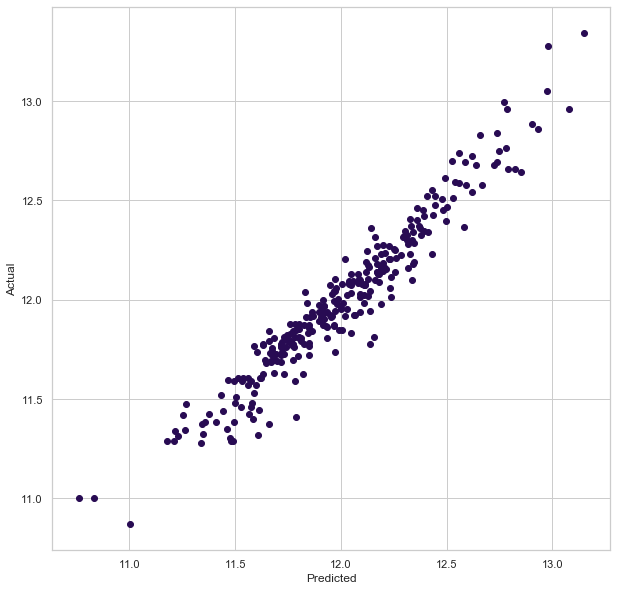

In [113]:
#Actual vs predicted values 
plt.figure(figsize = (10, 10))
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Cross validation and pipelining

In [198]:
#K-fold CV

n_folds = 10

def rmsle_kf(model):
    kf = KFold(n_folds, shuffle = True, random_state = 24).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y, scoring = "neg_mean_squared_error", cv = kf))
    
    return (rmse)

##### Note: All the hyper-parameters are obtained from Grid Search CV, code block is further down the line.

#### Linear Regression

In [117]:
#Creating the pipeline
#Linear Reg.
LR = make_pipeline(RobustScaler(),PCA(n_components = 70, random_state = 24),  LinearRegression())

#### Lasso Regression

In [199]:
#Lasso Reg.
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 24))

In [119]:
lasso_prototype = make_pipeline(RobustScaler(), Lasso(alpha = 0.001, copy_X = True, fit_intercept = True, max_iter = 1000,
      positive = False, precompute = False, random_state = 24, selection = "cyclic", tol = 0.0001, warm_start = False))

#### Ridge Regression

In [120]:
#PCA(n_components = , random_state = 24)

#Ridge Reg.
ridge = make_pipeline(RobustScaler(), Ridge(alpha = 0.0005, random_state = 24))

In [121]:
ridge_prototype = make_pipeline(RobustScaler(), Ridge(alpha = 10, copy_X = True, fit_intercept = True, 
                                                      max_iter = None, random_state = 24, solver = "auto", tol = 0.001))

#### Elastic Net Regression

In [122]:
#Elastic Net Reg.
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = 0.1, random_state = 24))

In [123]:
Enet_prototype = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.001, copy_X = True, fit_intercept = True, l1_ratio=0.9,
           max_iter = 1000, positive = False, precompute = False, random_state = 24, selection = "cyclic", 
           tol = 0.0001, warm_start = False))

#### Kernal Regression

In [124]:
#Kernal Rreg
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting

In [125]:
#Gradient Boosting
gboost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = 5)

In [126]:
gboost_prototype = GradientBoostingRegressor(n_estimators = 3500, learning_rate = 0.05,
                                   max_depth = 4, max_features = "sqrt",
                                   min_samples_leaf = 15, min_samples_split = 22, 
                                   subsample = 0.6, loss = 'huber', random_state = 5)

#### XGBoost

In [132]:
#XGboost
xgb = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.05, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 2200,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             random_state = 7, nthread = -1)

#### Light GBM

In [145]:
#Light GBM
lgb = lgb.LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate = 0.05, n_estimators = 720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

### Pipeline Evaluation

In [169]:
score = rmsle_kf(LR)
lr_model = print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.1177 (0.0112)



In [200]:
score = rmsle_kf(lasso)
print("\nLasso Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso Regression score: 0.1114 (0.0132)



In [171]:
score = rmsle_kf(lasso_prototype)
print("\nLasso Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso Regression score: 0.1134 (0.0125)



In [172]:
score = rmsle_kf(ridge)
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression score: 0.1216 (0.0162)



In [173]:
score = rmsle_kf(ridge_prototype)
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression score: 0.1126 (0.0135)



In [174]:
score = rmsle_kf(Enet)
print("\nElastic Net Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net Regression score: 0.1145 (0.0148)



In [175]:
score = rmsle_kf(Enet_prototype)
print("\nElastic Net Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net Regression score: 0.1129 (0.0126)



In [176]:
score = rmsle_kf(krr)
print("\nKernel Ridge Reg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge Reg score: 0.1110 (0.0138)



In [177]:
score = rmsle_kf(gboost)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1138 (0.0153)



In [178]:
score = rmsle_kf(gboost_prototype)
print("\nRenewed Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Renewed Gradient Boosting score: 0.1146 (0.0159)



In [179]:
score = rmsle_kf(xgb)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost score: 0.1150 (0.0152)



In [180]:
score = rmsle_kf(lgb)
print("\nLGB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGB score: 0.1153 (0.0153)



#### Using GridSearchCV

In [147]:
#Lasso Regression
print("****Lasso Regression****")
lasso_params = {"alpha": [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0]}
grid_lasso = GridSearchCV(Lasso(), lasso_params, cv = None)
grid_lasso.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}".format(grid_lasso.best_estimator_, grid_lasso.best_score_))

#Ridge Reg.
print("\n***Ridge Regression***")
ridge_params = {"alpha": [10, 8, 6, 5, 0.5, 0.05, 0.005, 0.0005, 4, 3, 2, 1, 0.1, 0.001, 0.0001, 0.00001]}
grid_ridge = GridSearchCV(Ridge(), ridge_params, cv = None)
grid_ridge.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}".format(grid_ridge.best_estimator_, grid_ridge.best_score_))

#Enet Regression
print("\n****Enet Regression****")
Enet_params =  {"alpha": [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0],
                "l1_ratio": [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.0005, 0.005, 0.05, 0.5, 0.8, 0.9]}
grid_enet = GridSearchCV(ElasticNet(), Enet_params, cv = None)
grid_enet.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}".format(grid_enet.best_estimator_, grid_enet.best_score_))

****Lasso Regression****

Best estimator: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 
Best score: 0.9019

***Ridge Regression***

Best estimator: Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) 
Best score: 0.9013

****Enet Regression****

Best estimator: ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
Best score: 0.902


In [ ]:
#Gradient Boosting
print("\n****Gradient Boosting****")
gboost_params = {"max_depth": list(range(4, 32, 4)),
                 "min_samples_split": [5, 6, 10, 15, 20, 22, 23, 24, 25, 30]}

grid_gboost = GridSearchCV(GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.1,
                 subsample = 0.8, max_features = "sqrt", min_samples_leaf = 15,), gboost_params, n_jobs = -1, cv = None)
grid_gboost.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}".format(grid_gboost.best_estimator_, grid_gboost.best_score_))

In [ ]:
#Gradient Boosting
print("\n****Gradient Boosting****")
gboost_params = {"min_samples_leaf": list(range(10, 50, 5)),
                 "max_features": [8, 9, 10, 16, 24, 30, 32]}

grid_gboost = GridSearchCV(GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.1,
                                                     subsample = 0.8, max_depth = 4,
                                                     min_samples_split = 22), 
                        gboost_params, n_jobs = -1, cv = None)
grid_gboost.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}".format(grid_gboost.best_estimator_, grid_gboost.best_score_))

In [ ]:
print("\n****Gradient Boosting****")
gboost_params = {"subsample": [0.2, 0.4, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9]}

grid_gboost = GridSearchCV(GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.1,
                                                     max_features = 32, max_depth = 4,
                                                     min_samples_split = 22, min_samples_leaf = 15
                                                     ), 
                        gboost_params, n_jobs = -1, cv = None)
grid_gboost.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}".format(grid_gboost.best_estimator_, grid_gboost.best_score_))

In [ ]:
print("\n****Gradient Boosting****")
gboost_params = {"n_estimators": list(range(500, 4000, 500))}

grid_gboost = GridSearchCV(GradientBoostingRegressor(learning_rate = 0.1,
                                                     max_features = 32, max_depth = 4,
                                                     min_samples_split = 22, min_samples_leaf = 15,
                                                     subsample = 0.6), 
                        gboost_params, n_jobs = -1, cv = None)
grid_gboost.fit(x_train, y_train)

print("\nBest estimator: {} \nBest score: {:.4}".format(grid_gboost.best_estimator_, grid_gboost.best_score_))

In [ ]:
#[0.9, 0.8, 0.6, 0.4, 0.25, 0.2, 0.15, 0.1, 0.5]
#"max_features": [8, 9, 10, 16, 24, 30, 32]
#"min_samples_leaf": list(range(10, 50, 5))
#"n_estimators": list(range(500, 4000, 500))

In [264]:
#Gradient Boosting
# print("\n****Gradient Boosting****")
# gboost_params = {"learning_rate": [0.1],
#                  "n_estimators": list(range(500, 4000, 500)), 
#                  "subsample": [0.2, 0.4, 0.6, 0.8],
#                  "max_depth": list(range(4, 32, 4)),
#                  "max_features": [8, 9, 10, 16, 24, 30, 32],
#                  "min_samples_leaf": list(range(10, 50, 5)),
#                  "min_samples_split": [5, 6, 10, 15, 20, 22, 23, 24, 25, 30]}

# grid_gboost = GridSearchCV(GradientBoostingRegressor(), gboost_params, n_jobs = -1, cv = None)
# grid_gboost.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}".format(grid_gboost.best_estimator_, grid_gboost.best_score_))

In [265]:
#XGBoost
# print("\n****XGBoost****")
# xgb_params = {"colsample_bytree": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#               "gamma": [0.0, 0.045, 0.0468, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
#               "max_depth": list(range(3, 10, 1)),
#               "min_child_weight": [1, 1.5, 1.6, 1.7, 1.8, 2, 2.5, 3],
#               "subsample": [0.5, 0.52, 0.55, 0.6, 0.7, 0.8, 0.9],
#               "reg_alpha": [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
#               "reg_lamda": [0.2, 0.4, 0.6, 0.8],
#               "n_estimators": list(range(500, 4000, 500)),
#               "learning_rate": [0.9, 0.8, 0.6, 0.4, 0.25, 0.2, 0.15, 0.1, 0.05]}

# grid_xgb = GridSearchCV(XGBRegressor(), xgb_params, n_jobs = -1, cv = None)
# grid_xgb.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}".format(grid_xgb.best_estimator_, grid_xgb.best_score_))

In [266]:
#LGBM
# print("\n****LGBM Regressor****")
# lgb_params = {"num_leaves": list(range(1, 80, 10)),
#               "min_data_in_leaf": list(range(6, 20, 2)),
#               "n_estimators": list(range(700, 800, 10)),
#               "min_sum_hessian_in_leaf": list(range(10, 20, 1))}

# grid_lgb = GridSearchCV(lgb.LGBMRegressor(), lgb_params, n_jobs = -1, cv = None)
# grid_lgb.fit(x_train, y_train)

# print("\nBest estimator: {} \nBest score: {:.4}".format(grid_lgb.best_estimator_, grid_lgb.best_score_))

## Final Prediction

### KRR model

In [204]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [208]:
krr.fit(train.values, y)
krr_train_pred = krr.predict(train.values)
krr_pred = np.expm1(krr.predict(test.values))
print(rmsle(y, krr_train_pred))

0.09377441519765893


### Lasso model

In [209]:
lasso.fit(train.values, y)
lasso_train_pred = lasso.predict(train.values)
lasso_pred = np.expm1(lasso.predict(test.values))
print(rmsle(y, lasso_train_pred))

0.10286688553221528


### Ridge model

In [210]:
ridge.fit(train.values, y)
ridge_train_pred = ridge.predict(train.values)
ridge_pred = np.expm1(ridge.predict(test.values))
print(rmsle(y, ridge_train_pred))

0.096048857346649


### ENET model

In [212]:
Enet.fit(train.values, y)
Enet_train_pred = Enet.predict(train.values)
Enet_pred = np.expm1(Enet.predict(test.values))
print(rmsle(y, Enet_train_pred))

0.09717892524316249


### GBM model

In [213]:
gboost.fit(train.values, y)
gbm_train_pred = gboost.predict(train.values)
gbm_pred = np.expm1(gboost.predict(test.values))
print(rmsle(y, gbm_train_pred))

0.05013195706704242


### XGB model

In [216]:
xgb.fit(train.values, y)
xgb_train_pred = xgb.predict(train.values)
xgb_pred = np.expm1(xgb.predict(test.values))
print(rmsle(y, xgb_train_pred))

0.07978001918075683


#### Using Rank averaging ensemble

In [218]:
#instances for RMSLE scores of each model
#1 
krr_model = rmsle(y, krr_train_pred) #(rmsle_kf(krr)).mean()

#2
lasso_model = rmsle(y, lasso_train_pred) #(rmsle_kf(lasso)).mean()

#3 
ridge_model = rmsle(y, ridge_train_pred) #(rmsle_kf(ridge_prototype)).mean()

#4
enet_model = rmsle(y, Enet_train_pred) #(rmsle_kf(Enet_prototype)).mean()

#5
gbm_model = rmsle(y, gbm_train_pred) #(rmsle_kf(gboost)).mean()

#6
xgb_model = rmsle(y, xgb_train_pred) #(rmsle_kf(xgb)).mean()

In [219]:
index_no = [1, 2, 3, 4, 5, 6]
rmsle_scores = [krr_model, lasso_model, ridge_model, 
                enet_model, gbm_model, xgb_model]
rank_eval = pd.DataFrame({"ModelScore": rmsle_scores}, index = index_no)
rank_eval

,ModelScore
1,0.093774
2,0.102867
3,0.096049
4,0.097179
5,0.050132
6,0.079780


In [220]:
sorted_rank = rank_eval.sort_values("ModelScore")
sorted_rank

,ModelScore
5,0.050132
6,0.079780
1,0.093774
3,0.096049
4,0.097179
2,0.102867


In [225]:
sorted_rank["rank"] = [6,5,4,3,2,1]
sorted_rank

,ModelScore,rank,weight
5,0.050132,6,0.047619
6,0.079780,5,0.095238
1,0.093774,4,0.142857
3,0.096049,3,0.190476
4,0.097179,2,0.238095
2,0.102867,1,0.285714


In [227]:
sorted_rank["weight"] = np.round(sorted_rank["rank"]/sorted_rank["rank"].sum(),2)
sorted_rank

,ModelScore,rank,weight
5,0.050132,6,0.29
6,0.079780,5,0.24
1,0.093774,4,0.19
3,0.096049,3,0.14
4,0.097179,2,0.10
2,0.102867,1,0.05


In [228]:
print('RMSLE score on train data:')
print(rmsle(y, gbm_train_pred*0.29 + xgb_train_pred*0.24 + krr_train_pred*0.19
           + ridge_train_pred*0.14 + Enet_train_pred*0.10 + lasso_train_pred*0.04))

RMSLE score on train data:
0.07240026613385742


In [231]:
pred_conclude = gbm_pred*0.29 + xgb_pred*0.24 + krr_pred*0.19 + ridge_pred*0.14 + Enet_pred*0.10 + lasso_pred*0.04

In [243]:
finale_preds = pd.DataFrame(pred_conclude)

In [245]:
#finale_preds.to_csv("the_end.csv", index = False)

## Submission

In [247]:
atlast = pd.read_csv("the_end.csv")

In [253]:
res_ult = pd.DataFrame()
res_ult['ID'] = test_id
res_ult['SalePrice'] = atlast.values
res_ult.to_csv('submission.csv',index=False)